## CIFAR10

## Imports

In [2]:
# to make import as we would be in root directory
import sys
sys.path.append('..')

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tf_layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets.cifar10 import load_data as load_data_CIFAR_10
from tensorflow.keras.losses import CategoricalCrossentropy

import nn
import nn.layers
import nn.activations
import nn.losses
import nn.network
import nn.callbacks
import demo_utils

## Loading data

In [6]:
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = load_data_CIFAR_10()

y_train_cifar10 = y_train_cifar10.flatten()
y_test_cifar10 = y_test_cifar10.flatten()

cifar10 = {
    'train': {
        'x': x_train_cifar10 / 255 - 0.5,
        'y': y_train_cifar10,
        'y_hot': np.array(tf.one_hot(y_train_cifar10, 10))
    },
    'test': {
        'x': x_test_cifar10 / 255 - 0.5,
        'y': y_test_cifar10,
        'y_hot': np.array(tf.one_hot(y_test_cifar10, 10))
    }
}

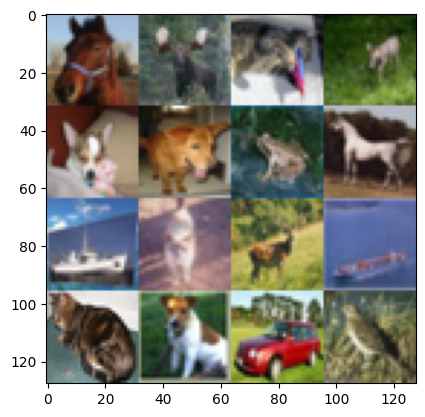

In [8]:
demo_utils.plot_random_images(cifar10['train']['x']+0.5)

## Tensorflow

### Creating and fitting

In [59]:
tf_model_cifar10 = keras.models.Sequential([
    tf_layers.InputLayer((32, 32, 3)),
    tf_layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Dropout(0.2),
    tf_layers.Flatten(),
    tf_layers.Dense(256, activation='relu'),
    tf_layers.Dropout(0.5),
    tf_layers.Dense(10 , activation=None)
])

In [60]:
tf_model_cifar10.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 4, 4, 128)       

In [61]:
tf_model_cifar10.compile(optimizer=SGD(learning_rate=0.001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'],
)

In [63]:
last_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_cifar10_last')
best_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_cifar10_best', save_best_only=True)

tf_cifar10_history = tf_model_cifar10.fit(
    cifar10['train']['x'],
    cifar10['train']['y_hot'],
    validation_data=(cifar10['test']['x'], cifar10['test']['y_hot']),
    epochs=10,
    batch_size=1,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback]
)

Epoch 1/10
49988/50000 [============================>.] - ETA: 0s - loss: 1.8589 - categorical_accuracy: 0.3039INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 1016s 20ms/step - loss: 1.8588 - categorical_accuracy: 0.3039 - val_loss: 1.5299 - val_categorical_accuracy: 0.4380
Epoch 2/10
49994/50000 [============================>.] - ETA: 0s - loss: 1.4546 - categorical_accuracy: 0.4681INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 663s 13ms/step - loss: 1.4546 - categorical_accuracy: 0.4680 - val_loss: 1.2538 - val_categorical_accuracy: 0.5500
Epoch 3/10
49997/50000 [============================>.] - ETA: 0s - loss: 1.2510 - categorical_accuracy: 0.5510INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 646s 13ms/step - loss: 1.2510 - categorical_accuracy: 0.5510 - val_loss: 1.0824 - val_categorical_accuracy: 0.6104
Epoch 4/10
49998/50000 [============================>.] - ETA: 0s - loss: 1.0995 - categorical_accuracy: 0.6061INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 650s 13ms/step - loss: 1.0995 - categorical_accuracy: 0.6061 - val_loss: 0.9884 - val_categorical_accuracy: 0.6494
Epoch 5/10
49990/50000 [============================>.] - ETA: 0s - loss: 0.9846 - categorical_accuracy: 0.6522INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 651s 13ms/step - loss: 0.9847 - categorical_accuracy: 0.6522 - val_loss: 0.8820 - val_categorical_accuracy: 0.6935
Epoch 6/10
49986/50000 [============================>.] - ETA: 0s - loss: 0.8927 - categorical_accuracy: 0.6881INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 649s 13ms/step - loss: 0.8927 - categorical_accuracy: 0.6881 - val_loss: 0.8216 - val_categorical_accuracy: 0.7118
Epoch 7/10
49999/50000 [============================>.] - ETA: 0s - loss: 0.8158 - categorical_accuracy: 0.7131INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 650s 13ms/step - loss: 0.8159 - categorical_accuracy: 0.7131 - val_loss: 0.8126 - val_categorical_accuracy: 0.7158
Epoch 8/10
49990/50000 [============================>.] - ETA: 0s - loss: 0.7554 - categorical_accuracy: 0.7365INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 653s 13ms/step - loss: 0.7553 - categorical_accuracy: 0.7366 - val_loss: 0.7770 - val_categorical_accuracy: 0.7284
Epoch 9/10
49999/50000 [============================>.] - ETA: 0s - loss: 0.7021 - categorical_accuracy: 0.7549INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 645s 13ms/step - loss: 0.7021 - categorical_accuracy: 0.7549 - val_loss: 0.7662 - val_categorical_accuracy: 0.7339
Epoch 10/10
49999/50000 [============================>.] - ETA: 0s - loss: 0.6563 - categorical_accuracy: 0.7716INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar10_best\assets


50000/50000 [==============================] - 555s 11ms/step - loss: 0.6563 - categorical_accuracy: 0.7716 - val_loss: 0.7377 - val_categorical_accuracy: 0.7501


### Results

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1000
           1       0.87      0.87      0.87      1000
           2       0.73      0.59      0.65      1000
           3       0.51      0.58      0.55      1000
           4       0.72      0.71      0.72      1000
           5       0.59      0.74      0.65      1000
           6       0.79      0.85      0.82      1000
           7       0.82      0.78      0.80      1000
           8       0.94      0.80      0.86      1000
           9       0.81      0.86      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



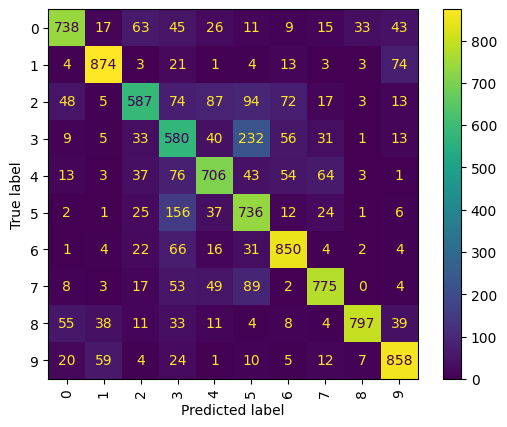

In [67]:
demo_utils.show_final_results(tf_model_cifar10, cifar10['test'])

## Own library

### Creating and fitting

In [54]:
layers = [
    nn.layers.InputLayer((32, 32, 3)),
    
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(32, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(64, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(128, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(64, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.DropoutLayer(0.2),
    nn.layers.FlattenLayer(),
    
    nn.layers.DenseLayer(256),
    nn.layers.BiasLayer(),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.DropoutLayer(0.5),
    nn.layers.DenseLayer(10),
    nn.layers.BiasLayer(),
]

own_model_cifar10 = nn.network.Sequential(layers)

In [55]:
own_model_cifar10.compile(
    loss='softmax_cce',
    metrics=['categorical_accuracy']
)

In [56]:
own_model_cifar10.summary()

NO   | NAME                 | PARAMS     | INPUT           | OUTPUT         
0    | InputLayer           | 0          | (32, 32, 3)     | (32, 32, 3)    
1    | Padding2DLayer       | 0          | (32, 32, 3)     | (34, 34, 3)    
2    | Conv2DLayer          | 896        | (34, 34, 3)     | (32, 32, 32)   
3    | ActivationLayer      | 0          | (32, 32, 32)    | (32, 32, 32)   
4    | Pool2DLayer          | 0          | (32, 32, 32)    | (16, 16, 32)   
5    | Padding2DLayer       | 0          | (16, 16, 32)    | (18, 18, 32)   
6    | Conv2DLayer          | 18496      | (18, 18, 32)    | (16, 16, 64)   
7    | ActivationLayer      | 0          | (16, 16, 64)    | (16, 16, 64)   
8    | Pool2DLayer          | 0          | (16, 16, 64)    | (8, 8, 64)     
9    | Padding2DLayer       | 0          | (8, 8, 64)      | (10, 10, 64)   
10   | Conv2DLayer          | 73856      | (10, 10, 64)    | (8, 8, 128)    
11   | ActivationLayer      | 0          | (8, 8, 128)     | (8, 8, 128)    

In [57]:
last_checkpoint_callback = nn.callbacks.ModelCheckpoint('saved_models/own_cifar10_last.dat', verbose=True)
best_checkpoint_callback = nn.callbacks.ModelCheckpoint('saved_models/own_cifar10_best.dat', save_best_only=True, monitor='val_loss', mode='min', verbose=True)
stopping_callback = nn.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

own_cifar10_history = own_model_cifar10.fit(
    cifar10['train']['x'],
    cifar10['train']['y_hot'],
    validation_data=(cifar10['test']['x'], cifar10['test']['y_hot']),
    learning_rate=0.001,
    epochs=10,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback, stopping_callback],
)

Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:00<00:00, 166.21it/s, val_loss=1.5125, val_categorical_accuracy=0.4537]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:00<00:00, 166.64it/s, val_loss=1.3408, val_categorical_accuracy=0.5217]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:00<00:00, 164.87it/s, val_loss=1.1415, val_categorical_accuracy=0.5964]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:12<00:00, 137.77it/s, val_loss=1.0050, val_categorical_accuracy=0.6430]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:13<00:00, 135.27it/s, val_loss=0.9948, val_categorical_accuracy=0.6565]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:13<00:00, 136.81it/s, val_loss=0.8580, val_categorical_accuracy=0.6981]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:13<00:00, 136.87it/s, val_loss=0.8209, val_categorical_accuracy=0.7144]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:12<00:00, 138.06it/s, val_loss=0.7700, val_categorical_accuracy=0.7324]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:11<00:00, 138.91it/s, val_loss=0.7462, val_categorical_accuracy=0.7418]


Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


Validate: 100%|██████████| 10000/10000 [01:11<00:00, 139.35it/s, val_loss=0.7350, val_categorical_accuracy=0.7436]

Saving model to saved_models/own_cifar10_last.dat
Saving model to saved_models/own_cifar10_best.dat


### Results

Predict: 100%|██████████| 10000/10000 [00:53<00:00, 187.16it/s]


              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1000
           1       0.90      0.82      0.86      1000
           2       0.61      0.68      0.64      1000
           3       0.56      0.56      0.56      1000
           4       0.67      0.73      0.70      1000
           5       0.70      0.61      0.65      1000
           6       0.73      0.88      0.80      1000
           7       0.89      0.69      0.77      1000
           8       0.84      0.85      0.85      1000
           9       0.81      0.85      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



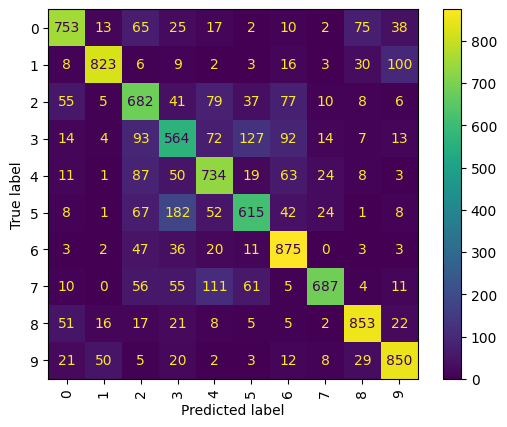

In [68]:
demo_utils.show_final_results(own_model_cifar10, cifar10['test'])

## History Comparison

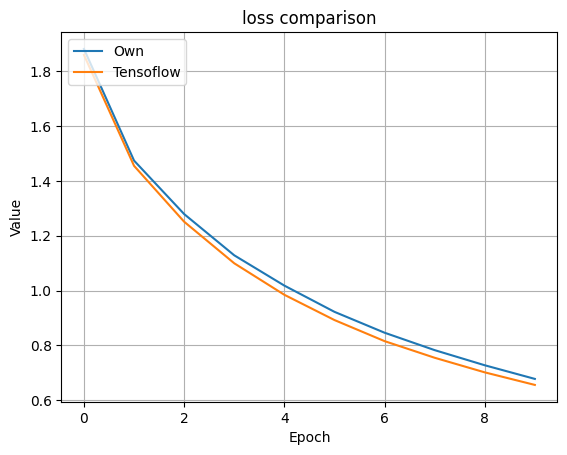

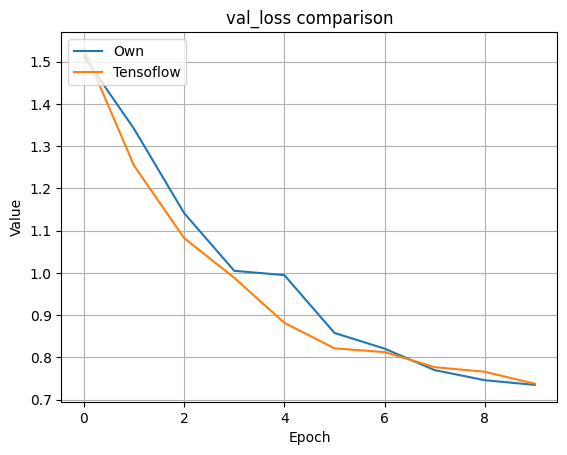

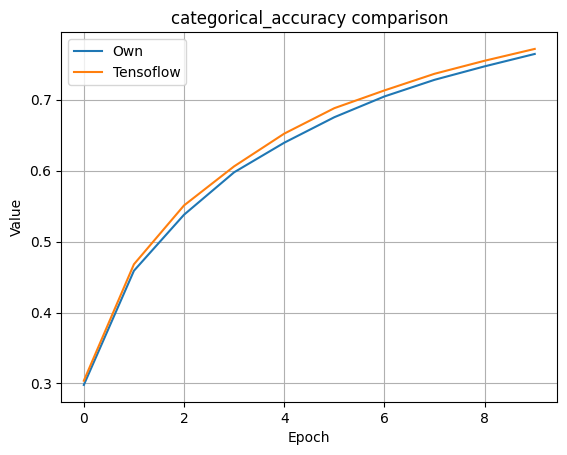

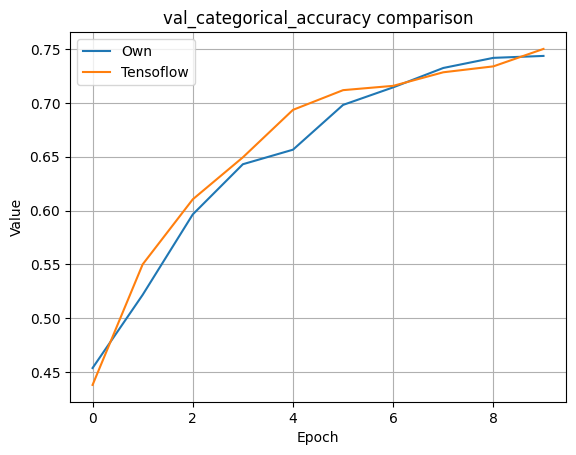

In [69]:

demo_utils.plot_history_comparison(own_cifar10_history, tf_cifar10_history.history)